In [251]:
import pandas as pd 
import numpy as np

In [252]:
dados = pd.read_csv('dados/api_horaria.csv', sep = ';')

In [253]:
dados.head(10)

,DAT_MED,HR_MED,TEM_INS,UMD_INS,VEN_VEL
0,2012-01-01,0,26.6,81.0,1.1
1,2012-01-01,100,26.3,81.0,0.8
2,2012-01-01,200,26.2,82.0,0.7
3,2012-01-01,300,26.0,83.0,0.2
4,2012-01-01,400,25.6,85.0,0.7
5,2012-01-01,500,25.2,87.0,0.1
6,2012-01-01,600,25.0,88.0,0.4
7,2012-01-01,700,24.8,89.0,0.3
8,2012-01-01,800,24.2,90.0,0.0
9,2012-01-01,900,24.2,91.0,0.1


In [254]:
dados.columns = ['data','hora','temperatura','umidade','vento']

In [255]:
dados.columns

Index(['data', 'hora', 'temperatura', 'umidade', 'vento'], dtype='object')

In [256]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85356 entries, 0 to 85355
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   data         85356 non-null  object 
 1   hora         85356 non-null  int64  
 2   temperatura  85356 non-null  float64
 3   umidade      85356 non-null  float64
 4   vento        85356 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.3+ MB


In [257]:
dados.shape

(85356, 5)

In [258]:
#tabela de correlação
import seaborn as sn
correlacao = dados.corr()
correlacao

,hora,temperatura,umidade,vento
hora,1.000000,0.502784,-0.455962,0.459993
temperatura,0.502784,1.000000,-0.947185,0.698533
umidade,-0.455962,-0.947185,1.000000,-0.691961
vento,0.459993,0.698533,-0.691961,1.000000


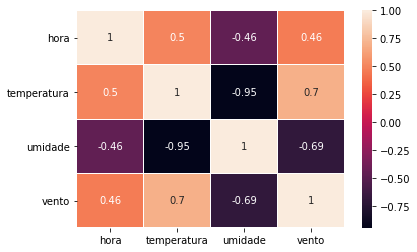

In [259]:
sn.heatmap(correlacao, annot = True, linewidths=.10)

## Selecionando a variavel que se quer prever (y)

In [297]:
y = dados['temperatura'].values
y_train=[]
for i in y :
    g = str(i)
    y_train.append(g)
y_train

['26.6',
 '26.3',
 '26.2',
 '26.0',
 '25.6',
 '25.2',
 '25.0',
 '24.8',
 '24.2',
 '24.2',
 '24.5',
 '26.9',
 '28.4',
 '29.1',
 '31.8',
 '32.7',
 '31.1',
 '31.2',
 '25.6',
 '28.3',
 '27.3',
 '27.7',
 '27.6',
 '27.2',
 '26.6',
 '25.9',
 '25.8',
 '25.4',
 '25.3',
 '25.2',
 '24.9',
 '24.7',
 '24.5',
 '24.4',
 '25.2',
 '26.8',
 '28.4',
 '29.7',
 '31.6',
 '32.9',
 '31.9',
 '31.0',
 '29.6',
 '30.7',
 '30.5',
 '29.8',
 '28.5',
 '27.3',
 '26.7',
 '26.0',
 '25.4',
 '24.8',
 '24.6',
 '24.1',
 '24.2',
 '24.0',
 '23.8',
 '23.7',
 '24.4',
 '25.3',
 '28.0',
 '29.4',
 '31.7',
 '32.2',
 '33.1',
 '32.8',
 '32.6',
 '32.7',
 '31.7',
 '30.2',
 '28.9',
 '27.9',
 '26.9',
 '26.4',
 '25.8',
 '25.5',
 '25.1',
 '25.0',
 '24.7',
 '24.6',
 '24.7',
 '24.2',
 '24.7',
 '26.8',
 '28.1',
 '30.5',
 '30.7',
 '31.2',
 '30.8',
 '28.8',
 '25.7',
 '27.3',
 '28.3',
 '27.5',
 '26.2',
 '25.8',
 '25.8',
 '25.6',
 '25.7',
 '25.5',
 '25.3',
 '25.3',
 '25.0',
 '24.8',
 '24.7',
 '24.4',
 '24.4',
 '25.0',
 '26.3',
 '27.3',
 '28.2',
 

## Selecionando as variaveis que irão ajudar a prever (X)

In [286]:
X = dados[['hora','umidade','vento']].values.reshape(85356,3)

In [262]:
dados.tail()

,data,hora,temperatura,umidade,vento
85351,2021-10-31,1900,29.4,69.0,2.7
85352,2021-10-31,2000,28.5,75.0,0.6
85353,2021-10-31,2100,27.3,80.0,0.3
85354,2021-10-31,2200,26.9,82.0,0.0
85355,2021-10-31,2300,27.0,83.0,0.5


In [263]:
dados_teste = dados.iloc[59748:]

In [264]:
x_teste = dados_teste[['hora','umidade','vento']].values.reshape(25608,3)

In [265]:
y_teste = dados_teste['temperatura'].values.reshape(25608,1)
y_teste

array([[27.2],
       [29.2],
       [29.6],
       ...,
       [27.3],
       [26.9],
       [27. ]])

In [272]:

len(y_teste)

y_teste_lista = []

for i in y_teste:
    y_teste_lista.append(i)
y_teste_lista = np.array(y_teste_lista)
len(y_teste_lista)

25608

## Criando o modelo 

In [289]:
from sklearn import tree
from sklearn.metrics import accuracy_score
tree_model =  tree.DecisionTreeRegressor()

In [290]:
tree_model = tree_model.fit(X,y)

In [292]:
previsoes = tree_model.predict(x_teste)
previsoes = previsoes.reshape(25608,1)
#tree_model.score(previsoes,y_teste)

In [ ]:
previsoes = np.array(previsoes)
len(previsoes)

In [ ]:
pd.concat([pd.DataFrame(previsoes),pd.DataFrame(y_teste_lista)], axis=1)

In [ ]:
accuracy_score()

In [319]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
# Dividir nossos dados
train, test, train_labels, test_labels = train_test_split(X,
                                                          y_train,
                                                          test_size=0.33,
                                                          random_state=42)


# Inicializar nosso classificador
gnb = GaussianNB()

# Treinar nosso classificador
model = gnb.fit(train, train_labels)   
preds = gnb.predict(test)
print(type(preds))
lista = []
print(preds)
for i in preds:
    x = int(i)
    x = round(x)
    lista.append(x)

# Avaliar a precisão
print(accuracy_score(test_labels, preds))  

<class 'numpy.ndarray'>
['24.0' '24.0' '31.0' ... '24.0' '24.6' '31.5']


ValueError: invalid literal for int() with base 10: '24.0'